In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.preprocessing.image import img_to_array,array_to_img,load_img

In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,Activation

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [5]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 4
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\patil\Videos\Silplilearn\Program\Practice\Course 4\Project\Project 3\data\train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\patil\Videos\Silplilearn\Program\Practice\Course 4\Project\Project 3\data\test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
from livelossplot import PlotLossesKerasTF

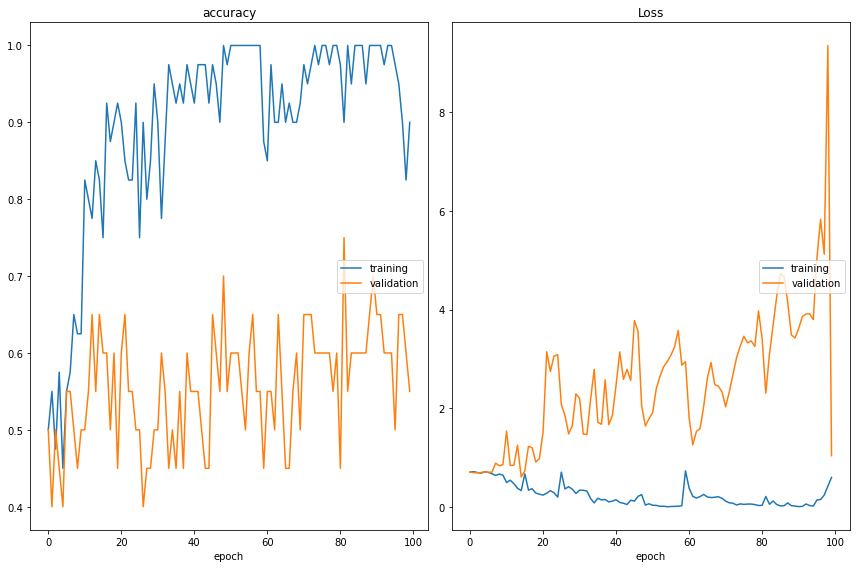

accuracy
	training         	 (min:    0.450, max:    1.000, cur:    0.900)
	validation       	 (min:    0.400, max:    0.750, cur:    0.550)
Loss
	training         	 (min:    0.002, max:    0.730, cur:    0.596)
	validation       	 (min:    0.606, max:    9.359, cur:    1.037)
10/10 [==============================] - 1s 130ms/step - loss: 0.5959 - accuracy: 0.9000 - val_loss: 1.0373 - val_accuracy: 0.5500


In [8]:
model.fit(
        train_generator,
        steps_per_epoch=40 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=20 // batch_size,callbacks=[PlotLossesKerasTF()])


In [9]:
model.save_weights('first_try.h5')  # always save your weights after training or during training

In [10]:
img = load_img(r'C:\Users\patil\Videos\Silplilearn\Program\Practice\Course 4\Live Session Data\CNN\cat1.jpg',target_size=(150,150))  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x=x/255
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

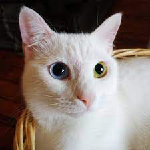

In [11]:
img

In [12]:
model.predict(x)

array([[0.00019199]], dtype=float32)

In [13]:
img2 = load_img(r'C:\Users\patil\Videos\Silplilearn\Program\Practice\Course 4\Live Session Data\CNN\download.jpg',target_size=(150,150))  # this is a PIL image
y = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
y=y/255
y = y.reshape((1,) + y.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

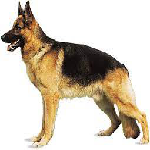

In [14]:
img2

In [15]:
model.predict(y)

array([[0.00019199]], dtype=float32)